In [2]:
import numpy as np
import pandas_datareader as web
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow import keras 
'''from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout'''

'from keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import LSTM\nfrom keras.layers import Dropout'

In [3]:
Sequential = keras.models.Sequential
Dense = keras.layers.Dense
LSTM = keras.layers.LSTM
Dropout = keras.layers.Dropout

In [4]:
df = web.DataReader("PETR4.SA", data_source="yahoo", start="2015-01-01", end="2019-12-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,9.990000,9.350000,9.990000,9.36,49559500.0,7.928355
2015-01-05,9.190000,8.530000,9.140000,8.56,78385100.0,7.250719
2015-01-06,8.830000,8.040000,8.710000,8.28,84723300.0,7.013545
2015-01-07,8.730000,8.360000,8.560000,8.67,85531000.0,7.343894
2015-01-08,9.390000,8.740000,8.790000,9.23,83306300.0,7.818239
...,...,...,...,...,...,...
2019-12-20,30.600000,30.020000,30.600000,30.26,93064900.0,27.249969
2019-12-23,30.500000,30.030001,30.190001,30.50,21970200.0,27.466095
2019-12-26,30.930000,30.500000,30.590000,30.91,24810500.0,27.835314


In [5]:
df.shape

(1241, 6)

In [6]:
df_bovespa = web.DataReader("^BVSP", data_source="yahoo", start="2015-01-01", end="2019-12-31")
# df_bovespa.reset_index(inplace=True,drop=False)
df_bovespa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,50005.0,48345.0,50005.0,48512.0,2882100.0,48512.0
2015-01-05,48512.0,47264.0,48512.0,47517.0,3866100.0,47517.0
2015-01-06,48061.0,47338.0,47517.0,48001.0,4559300.0,48001.0
2015-01-07,49882.0,48006.0,48006.0,49463.0,4408800.0,49463.0
2015-01-08,50261.0,49017.0,49463.0,49943.0,3621900.0,49943.0
...,...,...,...,...,...,...
2019-12-20,115171.0,114526.0,115133.0,115121.0,6887400.0,115121.0
2019-12-23,115863.0,114964.0,115119.0,115863.0,3995200.0,115863.0
2019-12-26,117220.0,115673.0,115864.0,117203.0,3788900.0,117203.0


In [7]:
df_bovespa.shape

(1235, 6)

In [8]:
df = df.merge(df_bovespa, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df.describe()

,High,Low,Open,Close,Volume,Adj Close,High_bovespa,Low_bovespa,Open_bovespa,Close_bovespa,Volume_bovespa,Adj Close_bovespa
count,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,16.946024,16.417725,16.693765,16.669887,5.410856e+07,14.364827,71258.726316,69996.229960,70605.106883,70656.285020,3.794215e+06,70656.285020
std,7.135614,7.025846,7.087856,7.081970,2.619016e+07,6.371996,19634.810008,19447.130086,19532.433000,19564.626768,1.203582e+06,19564.626768
min,4.270000,4.120000,4.200000,4.200000,0.000000e+00,3.557596,38031.000000,37046.000000,37501.000000,37497.000000,0.000000e+00,37497.000000
25%,11.150000,10.630000,10.910000,10.855000,3.727595e+07,9.194690,53498.500000,52677.000000,53087.500000,53094.500000,3.078600e+06,53094.500000
50%,15.520000,15.060000,15.300000,15.310000,4.868110e+07,12.968283,66758.000000,65842.000000,66195.000000,66235.000000,3.658900e+06,66235.000000
75%,23.160000,22.575000,22.810000,22.890000,6.523980e+07,19.496764,86157.000000,84582.500000,85515.000000,85539.000000,4.389100e+06,85539.000000
max,31.230000,30.500000,30.889999,30.969999,2.403438e+08,27.889343,117803.000000,115995.000000,117205.000000,117203.000000,1.104670e+07,117203.000000


In [9]:
#data = df.filter(["Close", "Volume", "Close_bovespa", "Volume_bovespa"])
data = df.filter(["Close"])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .7)
training_data_len
dataset.shape

(1235, 1)

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)

In [11]:
scaled_data

array([[0.19275308],
       [0.16286891],
       [0.15240941],
       ...,
       [0.99775871],
       [0.98319018],
       [0.97048939]])

In [12]:
train_data = scaled_data[0:training_data_len,:]
# print(train_data)
window = 60
X_train = []
y_train = []
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i,:])
    y_train.append(train_data[i, 0:1])
    # if i <= (window + 1):
    #   print(X_train)
    #   print(y_train)
    #   print()
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train.shape

(805, 60, 1)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))

In [15]:
X_train.shape

(805, 60, 1)

In [16]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 80)            57920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [17]:
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 64)

Epoch 1/50
13/13 [==============================] - 3s 201ms/step - loss: 0.0408
Epoch 2/50
13/13 [==============================] - 2s 166ms/step - loss: 0.0095
Epoch 3/50
13/13 [==============================] - 2s 166ms/step - loss: 0.0059
Epoch 4/50
13/13 [==============================] - 2s 161ms/step - loss: 0.0039
Epoch 5/50
13/13 [==============================] - 2s 173ms/step - loss: 0.0038
Epoch 6/50
13/13 [==============================] - 2s 178ms/step - loss: 0.0042
Epoch 7/50
13/13 [==============================] - 2s 180ms/step - loss: 0.0037
Epoch 8/50
13/13 [==============================] - 2s 167ms/step - loss: 0.0034
Epoch 9/50
13/13 [==============================] - 2s 154ms/step - loss: 0.0029
Epoch 10/50
13/13 [==============================] - 2s 154ms/step - loss: 0.0031
Epoch 11/50
13/13 [==============================] - 2s 160ms/step - loss: 0.0027
Epoch 12/50
13/13 [==============================] - 2s 166ms/step - loss: 0.0028
Epoch 13/50
13/13 [======

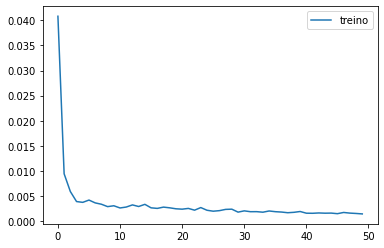

In [18]:
plt.plot(history.history['loss'], label='treino')
plt.legend()

In [19]:
test_data = scaled_data[training_data_len - window:, :]

X_test = []
y_test = dataset[training_data_len:, 0:1]

for i in range(window, len(test_data)): 
    X_test.append(test_data[i-window:i,:])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))
print(X_test.shape, X_train.shape)

(370, 60, 1) (805, 60, 1)


In [20]:
predicted = regressor.predict(X_test)
volume = dataset[training_data_len:, 1:]
predicted = np.column_stack((predicted, volume))
# print(dataset[:,1:])
print(predicted.shape)
predicted = sc.inverse_transform(predicted)
print(predicted)

(370, 1)
[[15.6693816 ]
 [15.96831952]
 [16.31537405]
 [16.66708777]
 [16.98142259]
 [17.24013741]
 [17.43030695]
 [17.5282762 ]
 [17.50717976]
 [17.42621819]
 [17.34074581]
 [17.26270342]
 [17.23408285]
 [17.24352491]
 [17.30567496]
 [17.4825594 ]
 [17.7593382 ]
 [18.11965548]
 [18.53268396]
 [18.88905369]
 [19.15469668]
 [19.3209599 ]
 [19.37648894]
 [19.36173588]
 [19.34366552]
 [19.41189088]
 [19.56961756]
 [19.7526507 ]
 [19.85871451]
 [19.8713486 ]
 [19.73776679]
 [19.52590405]
 [19.29560875]
 [19.01840233]
 [18.71311785]
 [18.38106052]
 [18.05253429]
 [17.71807556]
 [17.45713485]
 [17.27783704]
 [17.21195484]
 [17.28852687]
 [17.45619822]
 [17.73934353]
 [18.05826255]
 [18.38364063]
 [18.64975592]
 [18.78828095]
 [18.79469852]
 [18.7148459 ]
 [18.61462364]
 [18.46827371]
 [18.32454857]
 [18.19201509]
 [18.08902922]
 [18.07501812]
 [18.22744096]
 [18.50738865]
 [18.83710202]
 [19.16585483]
 [19.42950489]
 [19.599229  ]
 [19.67821361]
 [19.79351444]
 [19.94262638]
 [20.09402803]
 

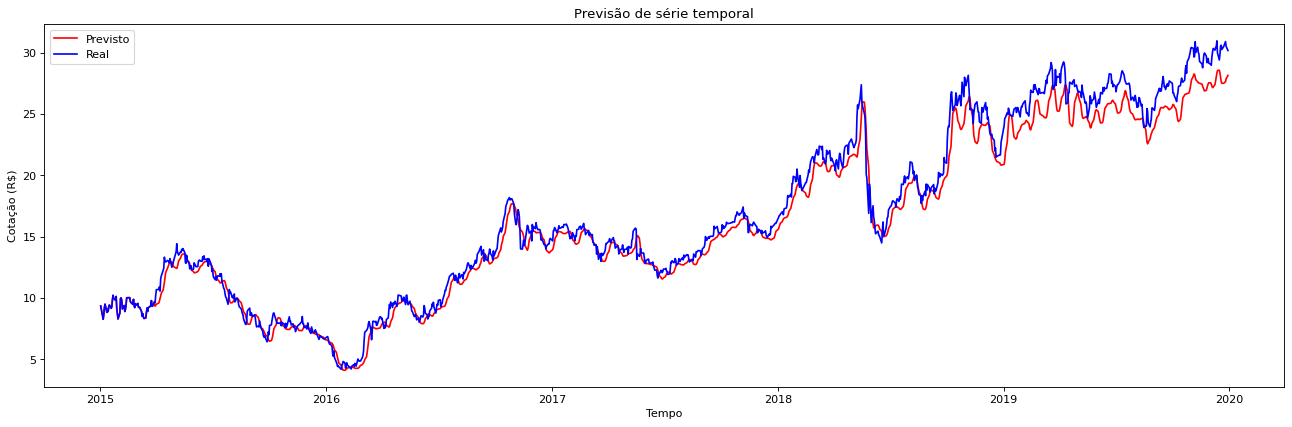

In [21]:
allTargetData = np.vstack((dataset[:training_data_len, 0:1], dataset[training_data_len:, 0:1]))
training_predicted = regressor.predict(X_train)
volume = dataset[:len(X_train), 1:]
training_predicted = np.column_stack((training_predicted, volume))
training_predicted = sc.inverse_transform(training_predicted)
allForecastedData = np.vstack((dataset[0:window, 0:1], training_predicted[:,0:1], predicted[:,0:1]))
# date = df['DATA']
date = df.index

figure(figsize=(20, 6), dpi=80)
plt.plot(date, allForecastedData, color = 'red', label = 'Previsto')
plt.plot(date, allTargetData, color = 'blue', label = 'Real')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [22]:
rmse = math.sqrt(mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1]))
print('RMSE: ', rmse)

RMSE:  1.8164573976606166


In [23]:
mse = mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1])
print('MSE: ',mse)

MSE:  3.2995174775159795


In [24]:
mape = np.mean(np.abs((dataset[training_data_len:, 0:1]-predicted[:,0:1]) /dataset[training_data_len:, 0:1])) * 100
print('MAPE: ',mape, '%')

MAPE:  6.0952050242026035 %


In [25]:
print('R2: ', r2_score(predicted[:,0:1], dataset[training_data_len:, 0:1]))

R2:  0.6371747865878952


In [26]:
scaled_data = scaled_data
window = 60
X_data = []
y_data = []
for i in range(window, len(scaled_data)):
    X_data.append(scaled_data[i-window:i,:])
    y_data.append(scaled_data[i, 0:1])
X_data, y_data = np.array(X_data), np.array(y_data)
history = regressor.fit(X_data, y_data, epochs = 50, batch_size = 64)

Epoch 1/50
19/19 [==============================] - 3s 169ms/step - loss: 0.0032
Epoch 2/50
19/19 [==============================] - 3s 136ms/step - loss: 0.0028
Epoch 3/50
19/19 [==============================] - 3s 133ms/step - loss: 0.0027
Epoch 4/50
19/19 [==============================] - 3s 139ms/step - loss: 0.0027
Epoch 5/50
19/19 [==============================] - 3s 158ms/step - loss: 0.0025
Epoch 6/50
19/19 [==============================] - 3s 159ms/step - loss: 0.0027
Epoch 7/50
17/19 [=========================>....] - ETA: 0s - loss: 0.0025

KeyboardInterrupt: 

In [ ]:
predicted = regressor.predict(X_data)
print(predicted)
volume = dataset[:len(X_data), 1:]
predicted = np.column_stack((predicted, volume))
predicted = sc.inverse_transform(predicted)
allForecastedData = predicted[:,0:1]
# date = df['DATA']
date = df.index
print(dataset.shape)
print(predicted.shape)
figure(figsize=(20, 6), dpi=80)
plt.plot(dataset[window:, 0:1], color = 'red', label = 'Previsto')
plt.plot(predicted[:,0:1], color = 'blue', label = 'Real')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [ ]:
from datetime import date, datetime, timedelta
today = datetime.today()
today_minus_100 = today - timedelta(days=100)
df_new = web.DataReader("PETR4.SA", data_source="yahoo", start=today_minus_100, end=today)
df_bovespa_new = web.DataReader("^BVSP", data_source="yahoo", start=today_minus_100, end=today)
df_dolar_new = web.DataReader("USDBRL=X", data_source="yahoo", start=today_minus_100, end=today)
df_new = df_new.merge(df_bovespa_new, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df_new = df_new.merge(df_dolar_new, left_on='Date', right_on='Date', suffixes=('', '_dolar'))
df_new = df_new.filter(["Close", "Volume", "Close_bovespa", "Volume_bovespa"])

print(df_new.tail())
last_days = df_new.values
scaled = sc.transform(last_days)
x = []
x.append(scaled)
x = np.array(x)
x = np.reshape(x, (x.shape[0], x.shape[1], -1))
pred_price = regressor.predict(x)
volume_new = last_days[0:1, 1:]
pred_price = np.column_stack((pred_price, volume_new))
pred_price = sc.inverse_transform(pred_price)
print(pred_price[0][0])